In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
class Bandit :
    def __init__(self, m) :
        #p : win rate
        self.m = m
        self.m_estimate = 0
        self.N = 0 #no of samples
        
    def pull(self) :
        #here the reward will be gaussian distributed
        return np.random.randn() + self.m
    
    def update(self, x) :
        self.N = self.N + 1
        self.m_estimate = ((self.N - 1) * self.m_estimate + x) / self.N
        
def exeriment(m1, m2, m3, eps, N) :
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    rewards = np.zeros(N)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    num_suboptimal = 0
    optimal_j = np.argmax([b.m for b in bandits])
    print(f'optimal_j : {optimal_j}')

    for i in range(N) :

        #use greedy epsilon to select the next bandit
        if np.random.random() < eps :
            num_times_explored += 1
            j = np.random.choice(list(range(len(bandits))))  #j is the index of the predicted optimal bandit
        else :
            num_times_exploited += 1
            j = np.argmax([b.m_estimate for b in bandits])

        if j == optimal_j :
            num_optimal += 1
        else :
            num_suboptimal += 1
        #pull the arm of the bandit with the largest sample
        x = bandits[j].pull()

        #update the rewards log
        rewards[i] = x

        #update the distribution for the bandit arm we just pulled
        bandits[j].update(x)
        
    #printing mean estimates of each bandit
    for b in bandits :
        print(f'Mean estimate : {b.m_estimate}')
        
    #total reward
    print(f'Total reward earned : {rewards.sum()}')
    print(f'Overall win rate : {rewards.sum() / N}')
    print(f'Number of times explored : {num_times_explored}')
    print(f'Number of times exploited : {num_times_exploited}')
    print(f'Number of times selected optimal bandit : {num_optimal}')
    print(f'Percent suboptimal for epsilon {eps} : {(num_suboptimal / N)}')

    
    cumulative_rewards = np.cumsum(rewards)  #cumulative_average
    win_rates = cumulative_rewards / (np.arange(N) + 1)
    plt.title(f'Eps {eps}')
    plt.plot(win_rates, label = 'Cumulative average')
    plt.plot(np.ones(N) * m1, label = 'True-Bandit 1')
    plt.plot(np.ones(N) * m2, label = 'True-Bandit 2')
    plt.plot(np.ones(N) * m3, label = 'True-Bandit 3')
    plt.legend()
    plt.xscale('log')
    plt.show()
    
    
    return cumulative_rewards

optimal_j : 2
Mean estimate : 1.5172865725286167
Mean estimate : 2.503166913717546
Mean estimate : 3.498513806446963
Total reward earned : 339596.39036115387
Overall win rate : 3.3959639036115385
Number of times explored : 10203
Number of times exploited : 89797
Number of times selected optimal bandit : 93141
Percent suboptimal for epsilon 0.1 : 0.06859


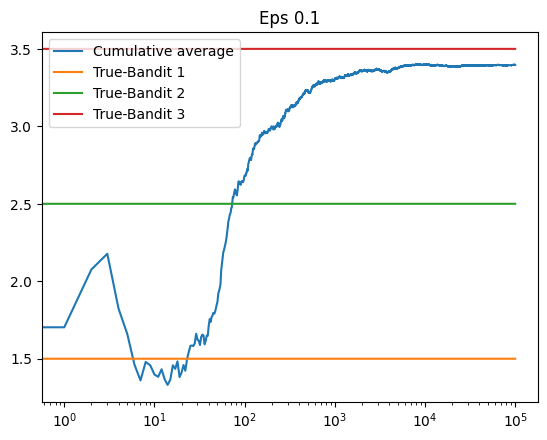

optimal_j : 2
Mean estimate : 1.4894972439917016
Mean estimate : 2.5272769084131297
Mean estimate : 3.5059313183558163
Total reward earned : 345372.12782980845
Overall win rate : 3.4537212782980844
Number of times explored : 5056
Number of times exploited : 94944
Number of times selected optimal bandit : 96506
Percent suboptimal for epsilon 0.05 : 0.03494


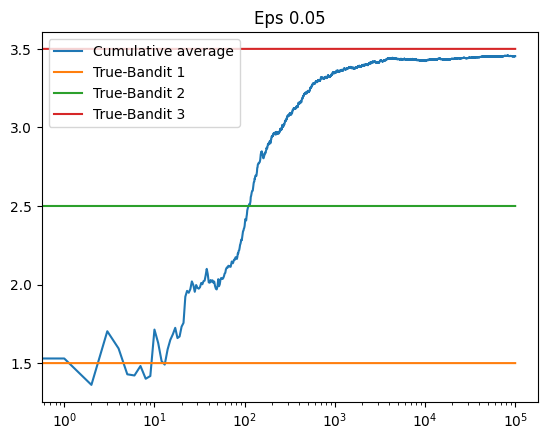

optimal_j : 2
Mean estimate : 1.516528754629791
Mean estimate : 2.484637354326789
Mean estimate : 3.5023542830394674
Total reward earned : 348687.559178884
Overall win rate : 3.48687559178884
Number of times explored : 1008
Number of times exploited : 98992
Number of times selected optimal bandit : 99027
Percent suboptimal for epsilon 0.01 : 0.00973


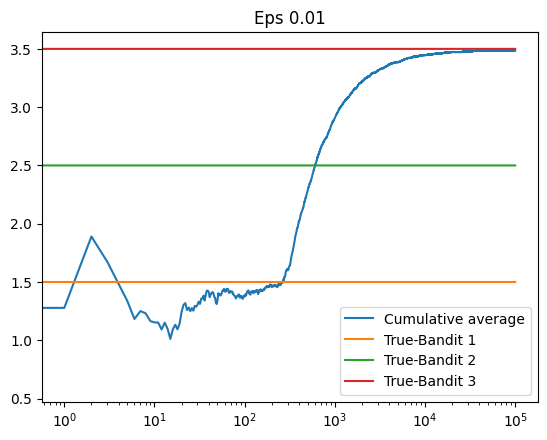

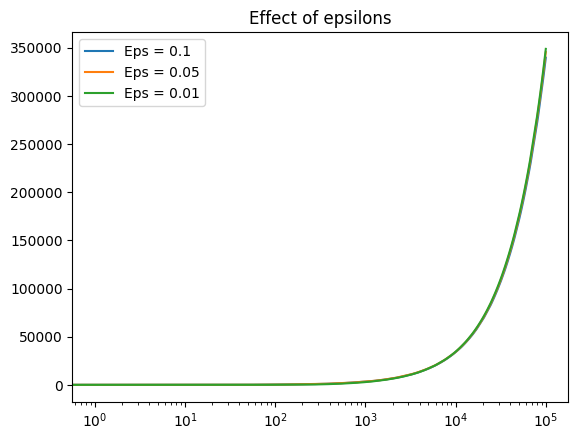

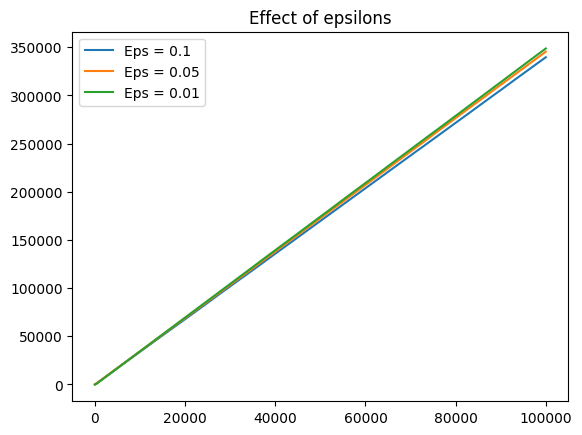

In [17]:
if __name__ == '__main__' :
    m1, m2, m3 = 1.5, 2.5, 3.5
    N = 100000
    c_1 = exeriment(m1, m2, m3, 0.1, N)
    c_05 = exeriment(m1, m2, m3, 0.05, N)
    c_01 = exeriment(m1, m2, m3, 0.01, N)
    
    #log scale plot
    plt.figure()
    plt.title('Effect of epsilons')
    plt.plot(c_1, label = 'Eps = 0.1')
    plt.plot(c_05, label = 'Eps = 0.05')
    plt.plot(c_01, label = 'Eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()
    
    #Linear plot
    plt.figure()
    plt.title('Effect of epsilons')
    plt.plot(c_1, label = 'Eps = 0.1')
    plt.plot(c_05, label = 'Eps = 0.05')
    plt.plot(c_01, label = 'Eps = 0.01')
    plt.legend()
    plt.show()